In [ ]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.target.shape

(70000,)

In [ ]:
pca = PCA(.95)

In [ ]:
lower_dimensional_data = pca.fit_transform(mnist.data)

In [ ]:
pca.n_components_

154

In [ ]:
approximation = pca.inverse_transform(lower_dimensional_data)

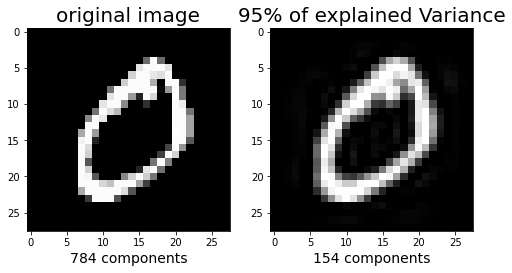

In [ ]:
plt.figure(figsize=(8,4));

plt.subplot(1, 2, 1);
plt.imshow(mnist.data.iloc[1].to_numpy().reshape(28,28),
           cmap= plt.cm.gray, interpolation='nearest',
           clim=(90,255))

plt.xlabel('784 components', fontsize=14)
plt.title('original image', fontsize=20);

plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
           cmap= plt.cm.gray, interpolation='nearest',
           clim=(0, 255));
plt.xlabel('154 components', fontsize=14)
plt.title('95% of explained Variance', fontsize=20);



In [ ]:
pca = PCA()

In [ ]:
pca.fit(mnist.data)

PCA()

In [ ]:
pca.n_components_

784

In [ ]:
tot = sum(pca.explained_variance_)
tot

3430023.4480794817

In [ ]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
print(var_exp[0:5])

[9.746115922494745, 7.155444586878719, 6.149530980723048, 5.40338452854818, 4.888933703877896]


In [ ]:
cum_var_exp = np.cumsum(var_exp)

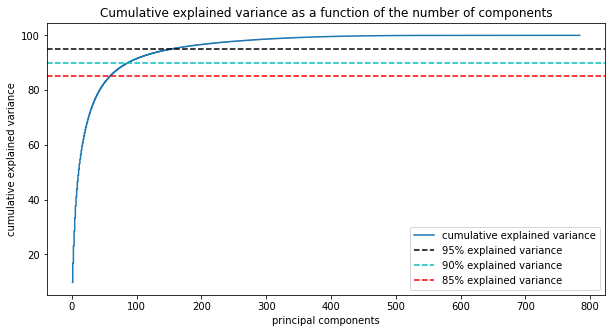

In [ ]:
plt.figure(figsize=(10,5))
plt.step(range(1, 785), cum_var_exp, where='mid', label='cumulative explained variance')
plt.title('Cumulative explained variance as a function of the number of components')
plt.ylabel('cumulative explained variance')
plt.xlabel('principal components')
plt.axhline(y=95, color='k', linestyle='--', label='95% explained variance')
plt.axhline(y=90, color='c', linestyle='--', label='90% explained variance')
plt.axhline(y=85, color='r', linestyle='--', label='85% explained variance')
plt.legend(loc='best')
plt.show()



In [ ]:
componentVariance =[784, np.argmax(cum_var_exp>99)+1,
                    np.argmax(cum_var_exp >95)+1,
                    np.argmax(cum_var_exp>90)+1,
                    np.argmax(cum_var_exp>85)+1] 

In [ ]:
componentVariance

[784, 331, 154, 87, 59]

In [ ]:
def explainedVariance(percentage, images):
  pca = PCA(percentage)
  pca.fit(images)
  components = pca.transform(images)
  approxOriginal = pca.inverse_transform(components)
  return approxOriginal

Text(0.5, 1.0, '85% of explained variance')

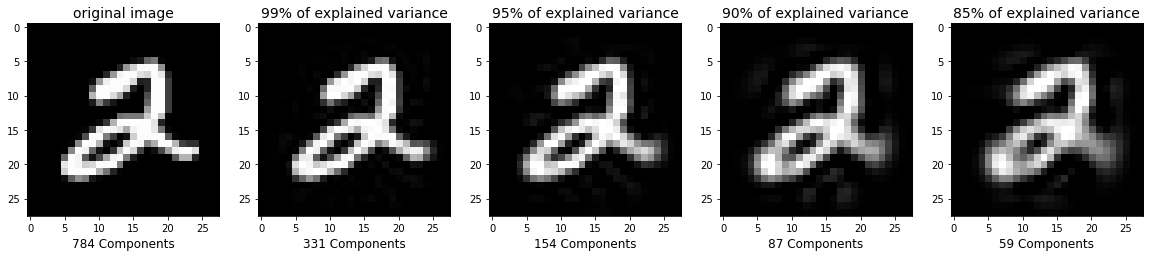

In [ ]:
plt.figure(figsize=(20,4));

#original
plt.subplot(1, 5, 1);
plt.imshow(mnist.data.iloc[5].to_numpy().reshape(28, 28),
           cmap= plt.cm.gray, interpolation='nearest',
           clim=(0, 255));

plt.xlabel('784 Components', fontsize=12)
plt.title('original image', fontsize=14)

#331
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),
           cmap= plt.cm.gray, interpolation='nearest',
           clim=(0, 255));

plt.xlabel('331 Components', fontsize=12)
plt.title('99% of explained variance', fontsize=14)


#154
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28),
           cmap= plt.cm.gray, interpolation='nearest',
           clim=(0, 255));

plt.xlabel('154 Components', fontsize=12)
plt.title('95% of explained variance', fontsize=14)


#87
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28),
           cmap= plt.cm.gray, interpolation='nearest',
           clim=(0, 255));

plt.xlabel('87 Components', fontsize=12)
plt.title('90% of explained variance', fontsize=14)

#59
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28),
           cmap= plt.cm.gray, interpolation='nearest',
           clim=(0, 255));

plt.xlabel('59 Components', fontsize=12)
plt.title('85% of explained variance', fontsize=14)